## Bresenham 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

In [54]:
def plotCells(p1, p2, cells, title):
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]])
    
    box = np.array([[0, 0],
                    [1, 0],
                    [1, 1],
                    [0, 1]])
    
    for q in cells:
        for k in range(box.shape[0]):
            kp1 = (k+1) % box.shape[0]
            plt.plot([q[0]+box[k][0], q[0]+box[kp1][0]],
                     [q[1]+box[k][1], q[1]+box[kp1][1]], 'k')

    plt.grid()
    plt.axis('equal')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.show()

Your task is to implement the bresenham function given two points $p_1$ and $p_2$ as inputs. The function should return the list of grid cells required to draw the line.

What conditions would warrant a move by 1 unit along the x-axis? What about along the y-axis?

The idea is to move based on whether the next $y$ value will be above or below the line from $p_1$ to $p_2$. We can keep track of the current line value, effectively $f(x)$ where $f$ is the line equation by incrementing a counter variable by the slope $m$ whenever we move in the x-axis.

The condition is then (in pseudocode):

```
if f(x+1) > y + 1:
    y += 1
else:
    x += 1
```

So, if moving along the y-axis results in a y value that is below the line, then move along the y-axis, otherwise,  move in the x-axis.

But what about the case where `f(x+1) == y+1`? This will be the result of every test case when the line slope `m = 1`. In this case you have a choice to make:
* Only identify cells that as "in collision" when the line actually passes through those cells (less conservative obstacle avoidance)
* When the line passes directly through a corner of grid cells, identify all cells that share that corner as "in collision" (more conservative obstacle avoidance). 

These two options look like this for a line from (0, 0) to (5, 5):

![comparison](./bresenham_comparison.png)


Try coding up both! In the event that you've padded obstacles  in your grid map with a sufficient safety margin, you can likely get away with the less conservative approach (or computer graphics based Bresenham implementation in the Python package shown below).


In [50]:
def bres(p1, p2): 
    """
    Note this solution requires `x1` < `x2` and `y1` < `y2`.
    """
    if p1[0] > p2[0]:
        # swap the points so that p1[x] < p2[x]
        p2, p1 = p1, p2
        
    x1, y1 = p1
    x2, y2 = p2
    
    dy = y2 - y1
    dx = x2 - x1
    # m = (y2-y1) / (x2-x1)
    # f = lambda x : m * x + y1
    # y = (dy/dx) * x + y1
    # dx * y = dy * x + dx * y1
    print('dx: %d, dy: %d' % (dx, dy))
    
    yi = 1
    if dy < 0:
        yi = -1
    
    x = x1
    y = y1
    #if dy < 0:
    #    y -= 1

    count = 0
    cells = []
    while not (x == (x2) and y == (y2)) and count < 20:#(x < (x2) or yi*y < yi*(y2)) and count < 20:
        cells.append((x,y))
        yp1 = dx*(y+yi)
        fxp1 = dy*(x+1-x1)+dx*y1
        D = yp1 - fxp1
        #print("fxp1:", fxp1, "yp1:", yp1)
        if D == 0:
            y += yi
            x += 1
        elif D*yi < 0:
            y += yi
        else:
            x += 1
                
        count += 1
    cells.append((x2,y2))
        
    return np.array(cells)

In [46]:
def bres3(p1, p2): 
    """
    Note this solution requires `x1` < `x2` and `y1` < `y2`.
    """
    if p1[0] > p2[0]:
        # swap the points so that p1[x] < p2[x]
        p2, p1 = p1, p2
        
    x1, y1 = p1
    x2, y2 = p2
    
    dy = y2 - y1
    dx = x2 - x1
    # m = (y2-y1) / (x2-x1)
    # f = lambda x : m * x + y1
    # y = (dy/dx) * x + y1
    # dx * y = dy * x + dx * y1
    print('dx: %d, dy: %d' % (dx, dy))
    
    yi = 1
    if dy < 0:
        yi = -1
    
    x = x1
    y = y1
    #if dy < 0:
    #    y -= 1

    count = 0
    cells = []
    while not (x == x2 and y == y2) and count < 20:#(x < (x2) or yi*y < yi*(y2)) and count < 20:
        cells.append((x,y))
        yp1 = 2*dx*(y-y1)+yi*dx
        fxp1 = 2*dy*(x+1-x1)
        D = yp1 - fxp1
        #print("fxp1:", fxp1, "yp1:", yp1)
        if D == 0:
            y += yi
            x += 1
        elif D*yi < 0:
            y += yi
        else:
            x += 1
                
        count += 1
        
    return np.array(cells)

In [5]:
def bres2(p1, p2):
    """
    Note this solution requires `x1` < `x2` and `y1` < `y2`.
    """
    x1, y1 = p1
    x2, y2 = p2
    cells = []
    
    # Here's a quick explanation in math terms of our approach
    # First, set dx = x2 - x1 and dy = y2 - y1
    dx, dy = x2 - x1, y2 - y1
    # Then define a new quantity: d = x dy - y dx.
    # and set d = 0 initially
    d = 0
    # The condition we care about is whether 
    # (x + 1) * m < y + 1 or moving things around a bit: 
    # (x + 1) dy / dx < y + 1 
    # which implies: x dy - y dx < dx - dy
    # or in other words: d < dx - dy is our new condition
    
    # Initialize i, j indices
    i = x1
    j = y1
    
    while i < x2 and j < y2:
        cells.append([i, j])
        if d < dx - dy:
            d += dy
            i += 1
        elif d == dx - dy:
            # uncomment these two lines for conservative approach
            #cells.append([i+1, j])
            #cells.append([i, j+1])
            d += dy
            i += 1  
            d -= dx
            j += 1
        else:
            d -= dx
            j += 1

    return np.array(cells)

Plotting the line with the cells which it crosses. 

dx: 9, dy: -5
[[ 0  1  1  2  3  3  4  5  5  6  7  7  8  9]
 [ 0  0 -1 -1 -1 -2 -2 -2 -3 -3 -3 -4 -4 -5]]


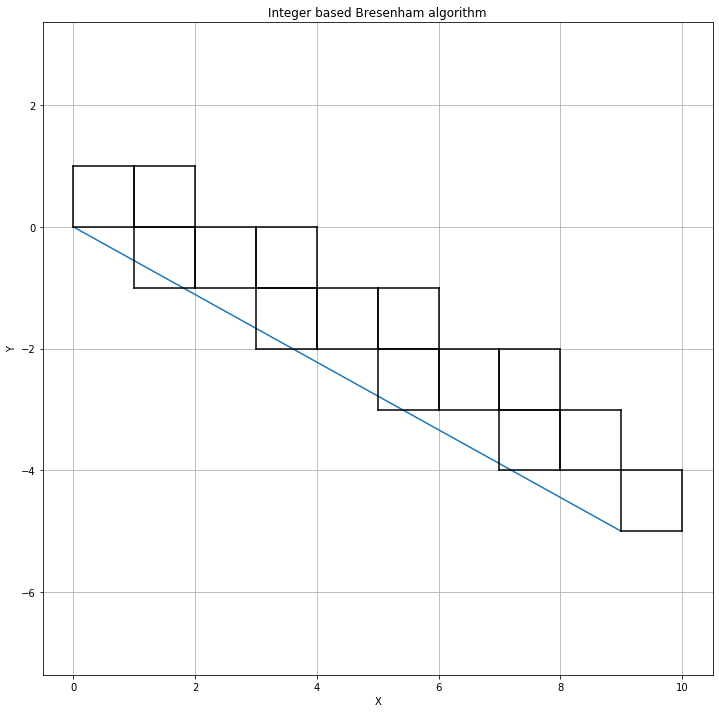

In [56]:
p1 = (0, 0)
p2 = (9, -5)

cells = bres(p1, p2)
print(cells.transpose())

plotCells(p1, p2, cells, "Integer based Bresenham algorithm")


Check out our solution [here](/notebooks/Bresenham-Solution.ipynb).

### Python Bresenham Package
For comparison let's have a look at the Python Bresenham package! As mentioned above, if you've added a safety margin around obstacles you are probably fine using this package or one like it that misses some cells in collision with the line.

First we need to import it:

In [31]:
def bresenham(x0, y0, x1, y1):
    """Yield integer coordinates on the line from (x0, y0) to (x1, y1).
    Input coordinates should be integers.
    The result will contain both the start and the end point.
    """
    dx = x1 - x0
    dy = y1 - y0

    xsign = 1 if dx > 0 else -1
    ysign = 1 if dy > 0 else -1

    dx = abs(dx)
    dy = abs(dy)

    if dx > dy:
        xx, xy, yx, yy = xsign, 0, 0, ysign
    else:
        dx, dy = dy, dx
        xx, xy, yx, yy = 0, ysign, xsign, 0

    D = 2*dy - dx
    y = 0

    x = 0
    while x != (dx+1):
        yield x0 + x*xx + y*yx, y0 + x*xy + y*yy
        if D > 0:
            y += 1
            D -= 2*dx
        x += 1
        D += 2*dy

Next we can run the same experiment as above and plot it up.

[(0, 0), (1, -1), (1, -2), (2, -3), (3, -4), (4, -5), (4, -6), (5, -7)]


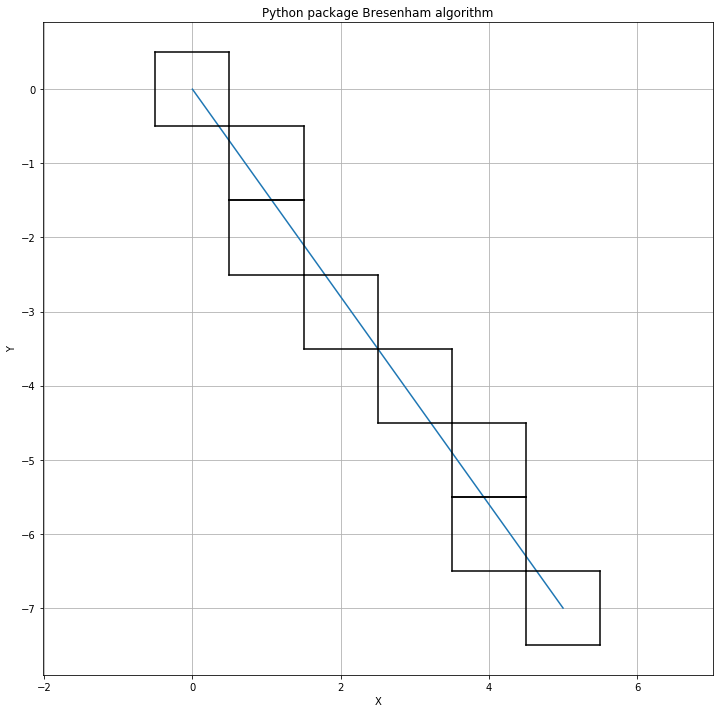

In [34]:
# Note: you can run this for any (x1, y1, x2, y2)
line = (0, 0, 5, -7)

cells = list(bresenham(line[0], line[1], line[2], line[3]))
print(cells)

plotCells(line[0:2], line[2:4], cells, "Python package Bresenham algorithm")